In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import time
from scipy.interpolate import interp1d
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
from scipy.signal import savgol_filter #Smooth
from scipy.optimize import curve_fit,fmin
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
#sys.path.append("../../package/")
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()

# Function

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

# Read File

In [3]:
cali_Co60 = np.loadtxt("../../data/INER/INER_TOF_gamma/CH2@DT5730B_1173_Espectrum_20230819_NaI_Calibration_Co60_20230819_165752.txt")
cali_Cs137 = np.loadtxt("../../data/INER/INER_TOF_gamma/CH2@DT5730B_1173_Espectrum_20230819_NaI_Calibration_Cs137_20230819_171803.txt")
INER_gamma = np.loadtxt("../../data/INER/INER_TOF_gamma/CH2@DT5730B_1173_Espectrum_20230413_INER_unfolding_60min_20230414_125635.txt")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


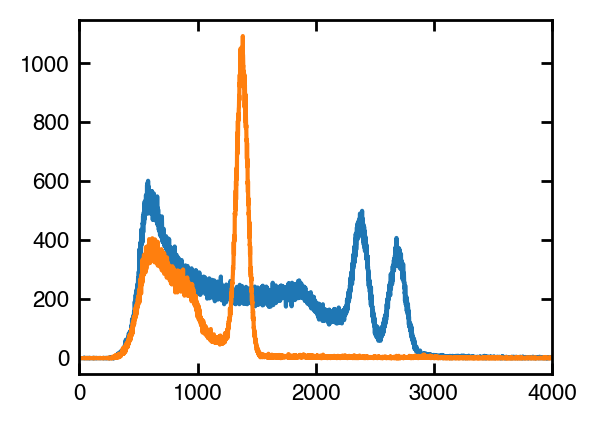

In [4]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(cali_Co60)
plt.plot(cali_Cs137)
fig_post_def(xlim=(0,4000))

In [5]:
peaks_Co60, _ = find_peaks(cali_Co60, height=400,distance = 200)
peaks_Cs137, _ = find_peaks(cali_Cs137, height=800,distance = 200)
print(peaks_Co60,"    ",peaks_Cs137)


[ 581 2393 2684]      [1383]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model slope:     0.0006373852409145411
Model intercept: -0.36716955210264524


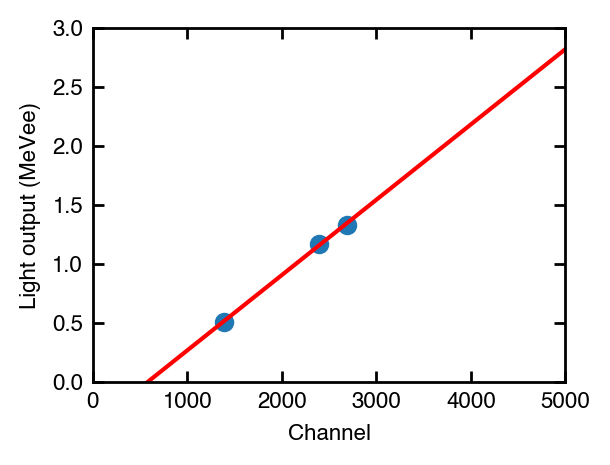

In [6]:

x1= np.array([1383,2393,2684])
y1= np.array([0.511,1.173,1.332])

model.fit(x1[:, np.newaxis], y1)

xfit = np.linspace(0, 5000, 100)
yfit = model.predict(xfit[:, np.newaxis])
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 
plt.scatter(x1, y1)
ax.plot(xfit, yfit,'r')
fig_post_def(xlim=(0,5000),ylim=(0,3),xlabel='Channel',ylabel='Light output (MeVee)')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

# INER_gamma 

In [7]:
ch = np.arange(0,len(INER_gamma),1)
E_ch = ch*0.000637385+(-0.3671695521)


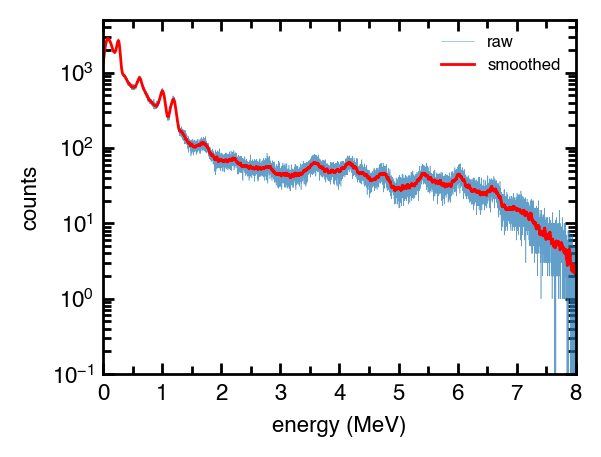

In [8]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 
ax.plot(E_ch,INER_gamma,linewidth = 0.2,alpha = 0.7,label="raw")


INER_gamma_smooth = savgol_filter(INER_gamma, 71, 3) 
ax.plot(E_ch,INER_gamma_smooth,'r',linewidth = 1,label= "smoothed")


fig_post_def(xlim=(0,8),ylim=(0.1,5000)
            ,xticks=(1,0.5)
            ,xlabel='energy (MeV)',ylabel='counts')
plt.yscale('log')

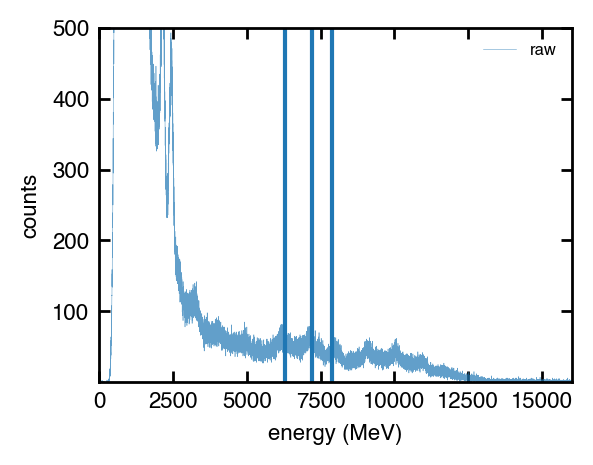

In [20]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 
ax.plot(ch,INER_gamma,linewidth = 0.2,alpha = 0.7,label="raw")

plt.axvline(7900)
plt.axvline(7200)
plt.axvline(6300)
fig_post_def(xlim=(0,16000)
            ,ylim=(0.1,500)
            #,xticks=(1,0.5)
            ,xlabel='energy (MeV)',ylabel='counts')
#plt.yscale('log')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model slope:     0.0006217616580310886
Model intercept: -0.5352331606217651


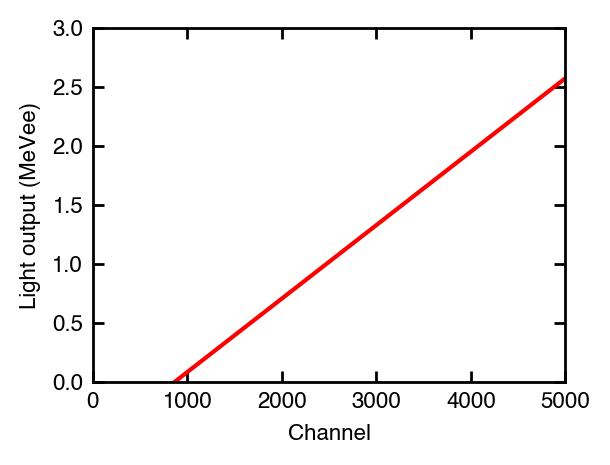

In [21]:

x1= np.array([6300,7200,7900])
y1= np.array([3.4,3.9,4.4])

model.fit(x1[:, np.newaxis], y1)

xfit = np.linspace(0, 5000, 100)
yfit = model.predict(xfit[:, np.newaxis])
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 
plt.scatter(x1, y1)
ax.plot(xfit, yfit,'r')
fig_post_def(xlim=(0,5000),ylim=(0,3),xlabel='Channel',ylabel='Light output (MeVee)')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

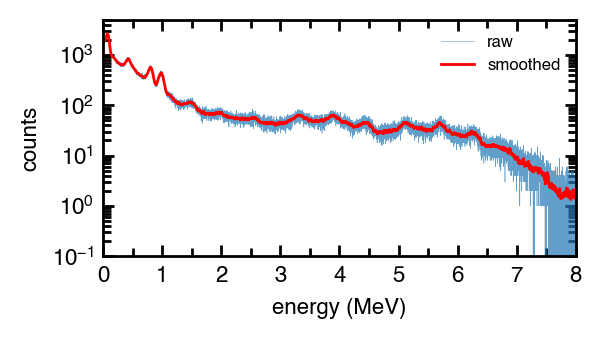

In [23]:
fig = fig_pre_def(6,3,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 

E_ch = ch*0.0006217+(-0.535233)
ax.plot(E_ch,INER_gamma,linewidth = 0.2,alpha = 0.7,label="raw")


INER_gamma_smooth = savgol_filter(INER_gamma, 71, 3) 
ax.plot(E_ch,INER_gamma_smooth,'r',linewidth = 1,label= "smoothed")


fig_post_def(xlim=(0,8),ylim=(0.1,5000)
            ,xticks=(1,0.5)
            ,xlabel='energy (MeV)',ylabel='counts')
plt.yscale('log')

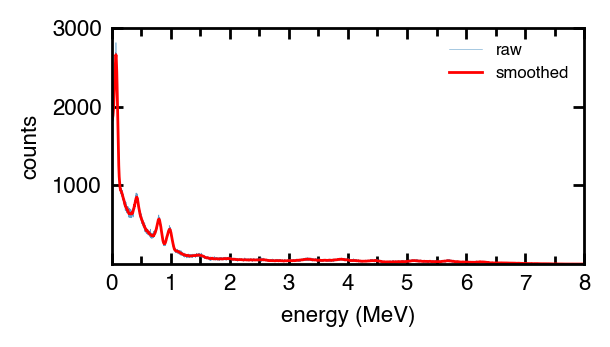

In [25]:
fig = fig_pre_def(6,3,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 

E_ch = ch*0.0006217+(-0.535233)
ax.plot(E_ch,INER_gamma,linewidth = 0.2,alpha = 0.7,label="raw")


INER_gamma_smooth = savgol_filter(INER_gamma, 71, 3) 
ax.plot(E_ch,INER_gamma_smooth,'r',linewidth = 1,label= "smoothed")


fig_post_def(xlim=(0,8),ylim=(0.1,3000)
            ,xticks=(1,0.5)
            ,xlabel='energy (MeV)',ylabel='counts')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


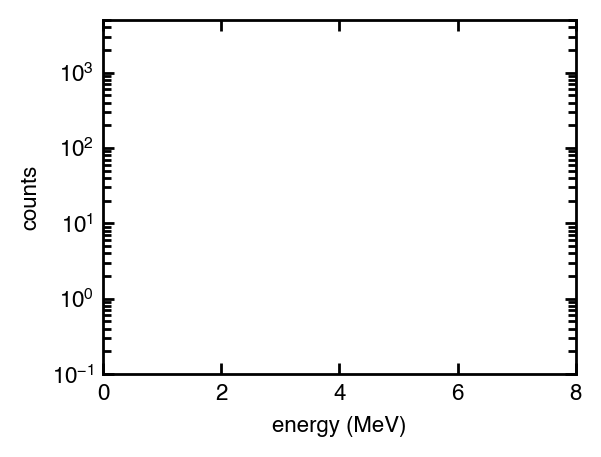

In [10]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(2, 1, 1) 

fig_post_def(xlim=(0,8),ylim=(0.1,5000),xlabel='energy (MeV)',ylabel='counts')
plt.yscale('log')
